In [1]:
import pandas as pd
from scipy.interpolate import splrep, BSpline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

from matplotlib import pyplot as plt
import numpy as np
import os

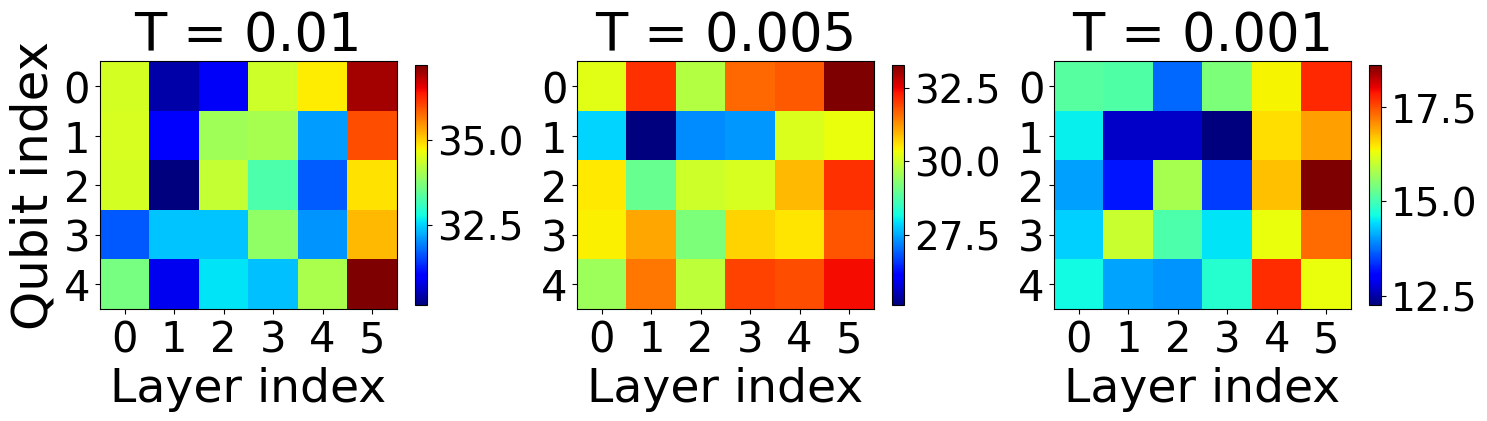

In [ ]:
# plot Heat maps w.r.t. parameter freezing

trials = 50
layers = 3
qubits = 5
iters = 50

# choose ansatz: A, B, C or D
ansatz = "C"


dvals = [0.01,0.005, 0.001]

fig, axes = plt.subplots(1, len(dvals))

fig.set_figheight(6)
fig.set_figwidth(15)

for d, ax in zip(dvals, axes.flatten()):
    df = pd.read_excel(f"data/1DHeisenberg_{qubits}Q_rotosolve_NoFreezeCounts_d{d}_GateIters_{iters}cycles_{layers}layers_{trials}trials_{ansatz}.xlsx")
    df["mean"] = df.mean(axis=1) 
    means = np.array(df["mean"]) 

    c = means.reshape(layers*2, qubits).T
    im = ax.imshow(c, cmap='jet', interpolation='nearest')
    clb = plt.colorbar(im, ax=ax, shrink=0.42)
    clb.ax.tick_params(labelsize=28) 
    ax.set_title(f"T = {d}", fontsize=38)
    
    ax.set_xticks(range(2*layers))
    ax.set_yticks(range(qubits))

    ax.set_xlabel("Layer index", fontsize=34)
    ax.tick_params(labelsize=30)

axes[0].set_ylabel("Qubit index", fontsize=36)

#fig.suptitle(f"Rotosolve without gate freezing, {qubits} qubits and {layers} layers", fontsize=25, y=1.0)
fig.tight_layout()

fig.savefig(f"NoFreezeCountsHeatMap_Rotosolve_1DHeisenberg_{qubits}Q_layers{layers}_{iters}iters_{trials}trials_Ansatz_{ansatz}.pdf", bbox_inches='tight')
